In [252]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import r2_score
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [253]:
#load and read csv file
data_module= pd.read_csv("Position_Salaries.csv")
data_module.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [254]:
data_module=data_module[['Level','Salary']]
data_module.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [255]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Level     10 non-null int64
Salary    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes


In [256]:
data_module.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [257]:
data_module.isnull().sum()

Level     0
Salary    0
dtype: int64

In [258]:
#split dataset into train data an dtest data
train,test= train_test_split(data_module,test_size=0.2,random_state=0)

In [259]:
print("train data:",train.shape)
print("test data:",test.shape)

train data: (8, 2)
test data: (2, 2)


In [260]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)

In [261]:
train_module= pd.read_csv("train.csv")
train_module.head()

,Level,Salary
0,5,110000
1,10,1000000
2,2,50000
3,7,200000
4,8,300000


In [262]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [263]:
x_train = train_data.iloc[:,:-1].values
y_train = train_data.iloc[:,1].values

In [264]:
print("x_train data set",x_train.shape)
print("y_train data set",y_train.shape)

x_train data set (5, 1)
y_train data set (5,)


In [265]:
#feature scalling on cross-validate data
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train= sc_x.fit_transform(x_train.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
y_train=sc_y.fit_transform(y_train.reshape(-1,1))

In [266]:
# fitting simple linear regression to the training dataset
regressor = DecisionTreeRegressor() 
regressor.fit( x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [267]:
y_pred_train= regressor.predict(x_train)

In [268]:
y_pred_train

array([-0.23284516,  0.41394695, -0.75027884, -1.1383541 ,  1.70753116])

In [269]:
#train
train_accuracy= sklearn.metrics.r2_score(y_train,y_pred_train)*100
train_accuracy

100.0

In [270]:
# file = open("train_data.pkl",'wb')
# pickle.dump(regressor,file)

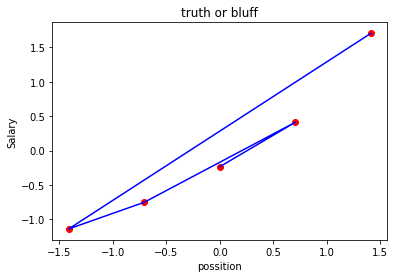

In [271]:
#visualizing the train result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("truth or bluff")
plt.xlabel("possition")
plt.ylabel("Salary")
plt.show()

In [272]:
file = open("train_data.pkl",'wb')
pickle.dump(regressor,file)

In [273]:
file1= open("train_data.pkl",'rb')
regressor1=pickle.load(file1)

In [274]:
cv_data.to_csv("cv_data.csv",index= False)

In [275]:
cv_data_x = cv_data.iloc[:,:-1].values
cv_data_y= cv_data.iloc[:,1].values

In [276]:
print("cross validate data x:",cv_data_x.shape)
print("cross_validate data y:",cv_data_y.shape)

cross validate data x: (3, 1)
cross_validate data y: (3,)


In [277]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_y.fit_transform(cv_data_y.reshape(-1,1))

In [278]:
y_pred_cv = regressor1.predict(cv_data_x)

In [279]:
y_pred_cv

array([-0.75027884, -0.75027884,  1.70753116])

In [280]:
#train
cv_accuracy= sklearn.metrics.r2_score(cv_data_y,y_pred_cv)*100
cv_accuracy

97.00551005724562

In [281]:
# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5) 
  
#     # Performing training 
# clf_entropy.fit(x_train, y_train) 

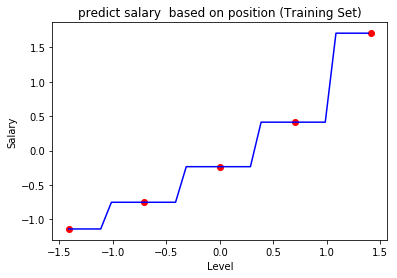

In [282]:
# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict salary  based on position (Training Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

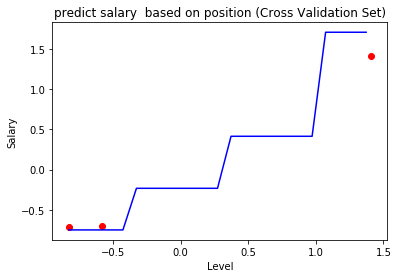

In [283]:
# visualizing the testing set result
x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(cv_data_x,cv_data_y,color='red')
plt.plot(x_grid,regressor.predict(x_grid),color='blue')
plt.title('predict salary  based on position (Cross Validation Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()
